In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('tutorial.csv', delimiter=';')

In [4]:
df.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.000000
1,-1,0,BANANAS,4946,1,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,0.000000
2,-1,100,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,-2.000000
3,-1,100,BANANAS,4945,31,NaN,NaN,NaN,NaN,4950,7,4952.0,31.0,NaN,NaN,4947.5,-2.555664
4,-1,200,BANANAS,4945,22,NaN,NaN,NaN,NaN,4951,1,4952.0,21.0,NaN,NaN,4948.0,-2.204590
5,-1,200,PEARLS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,-6.000000
6,-1,300,PEARLS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,-10.000000
7,-1,300,BANANAS,4945,25,NaN,NaN,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4948.5,-2.395996
8,-1,400,PEARLS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,-18.000000
9,-1,400,BANANAS,4946,5,4945.0,25.0,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4949.0,-2.662598


In [13]:
pearls = df[df['product'] == 'PEARLS']
pearls.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
2,-1,100,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,-2.0
5,-1,200,PEARLS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,-6.0
6,-1,300,PEARLS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,-10.0
8,-1,400,PEARLS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,-18.0


{9998: 1703.0, 9995.0: 49295.0, 9996: 1947.0, 10002: 425, 10000: 138.0}


<BarContainer object of 5 artists>

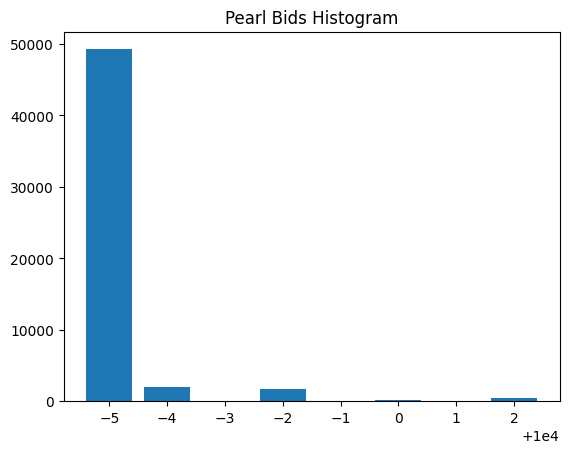

In [24]:
pearls_bids = {}

for index, row in pearls.iterrows():
    for i in range(1, 4):
        name = 'bid_price_' + str(i)
        vol_name = 'bid_volume_' + str(i)
        
        if math.isnan(row[name]):
            continue

        if row[name] in pearls_bids:
            pearls_bids[row[name]] += row[vol_name]
        else:
            pearls_bids[row[name]] = row[vol_name]

print(pearls_bids)

plt.title("Pearl Bids Histogram")
plt.xlabel("Price (Relative to fair Price of 10000)")
plt.ylabel("Occurrences")
plt.bar(pearls_bids.keys(), pearls_bids.values())

{10005: 49312.0, 10002: 1774.0, 10004.0: 1946.0, 9998: 393, 10000: 142.0}


<BarContainer object of 5 artists>

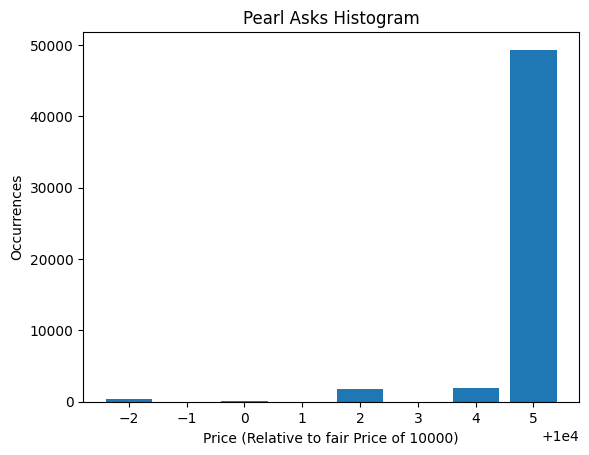

In [25]:
pearls_asks = {}

for index, row in pearls.iterrows():
    for i in range(1, 4):
        name = 'ask_price_' + str(i)
        vol_name = 'ask_volume_' + str(i)
        
        if math.isnan(row[name]):
            continue

        if row[name] in pearls_asks:
            pearls_asks[row[name]] += row[vol_name]
        else:
            pearls_asks[row[name]] = row[vol_name]

print(pearls_asks)

plt.title("Pearl Asks Histogram")
plt.xlabel("Price (Relative to fair Price of 10000)")
plt.ylabel("Occurrences")
plt.bar(pearls_asks.keys(), pearls_asks.values())

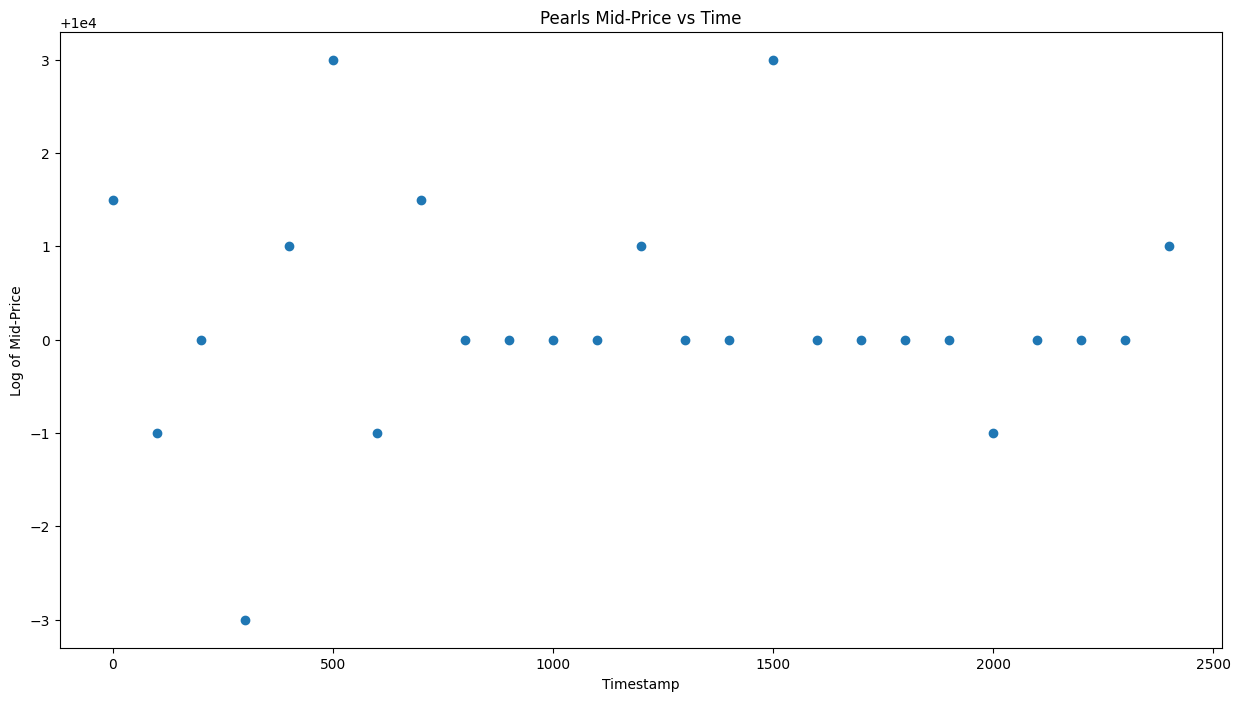

In [11]:
x = pearls['timestamp'][:25]
# y = np.log(pearls['mid_price'].to_numpy())
y = pearls['mid_price'][:25]

plt.figure(figsize=(15, 8))
plt.title('Pearls Mid-Price vs Time')
plt.xlabel('Timestamp')
plt.ylabel('Log of Mid-Price')
# plt.plot(x, y, linewidth=1)
plt.scatter(x, y)
plt.show()

In [8]:
bananas = mids[mids['product'] == 'BANANAS']
bananas.head()

,timestamp,product,mid_price
1,0,BANANAS,4949.0
3,100,BANANAS,4947.5
4,200,BANANAS,4948.0
7,300,BANANAS,4948.5
9,400,BANANAS,4949.0


In [ ]:
x = bananas['timestamp']
y = np.log(bananas['mid_price'].to_numpy())
# y = bananas['mid_price']

plt.figure(figsize=(15, 8))
plt.title('Bananas Mid-Price vs Time')
plt.xlabel('Timestamp')
plt.ylabel('Log of Mid-Price')
plt.plot(x, y, linewidth=1)
plt.show()